Først importerer jeg alle biblioteker som jeg har tengt å bruke.

In [49]:
import matplotlib.pyplot as plt
import numpy as np

Initialisere variabler som skal benyttes senere. `tid`og `ems` er lister, mens `eksponent` er bare en tall verdi. `eksponent` brukes til å gjøre **hele** grafen til større tall. Jeg vil anbefale *1e5* for denne gjør det mest leselig. `farger` er en liste med farger som skal brukes i grafen. Den kunne vært lengre, men må minst være 4 lang, den brukes for å få de samme fargene på hvert bilde av grafen.

In [50]:
tid = []
ems = []
eksponent = 1e5
farger = ["b","orange","g","r", "c", "m", "y", "k", "w"]

Lager en funksjon som plotter en plot, slik jeg vil den skal plottes, så sparer jeg tid hver gang jeg skal plotte noe.
Tar inn tre verdier, alle må være tekst, slik jeg får en tittel, x-akse navn og y-akse navn, og ingen feilmeldinger. Dette er tvunget og om jeg fører feil vil den enten gå til det jeg har satt som default, eller gi en feilmelding.

In [51]:
def do_plot(x_label: str = "X-verdier", y_label: str ="Y-verider", title: str = "Graf"):
    plt.grid()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    legend = plt.legend(loc='upper left', shadow=True)
    plt.show()

Her leser jeg dataen fra førsøket. Dette gjør jeg med `open()`funksjonen, jeg legger så hver linje til i en liste, `lines`, og så lukker jeg filen, for å spare RAM, ordner sikkelige leserettigheter for filen (om et annet program skal benytte filen også) og det trengs ikke lenger at den er åpen.

In [52]:
dtf = open("induksjon_egen_23042024.csv", "r")
lines = dtf.readlines()
dtf.close()

Først starter jeg med å dele opp første linje, denne vet jeg er hvilket forsøk det er, 1, 2, 3 osv. Jeg deler så dette opp i en liste (`lables`). Jeg gjør det samme med linje to, (`sublables`). Etter dette fjerner jeg alle gjentagende elementer i `lables`, slik at jeg får en liste med unike verdier. Dette gjør jeg for å kunne telle hvor mange forsøk det er, og hvor mange variabler hvert forsøk har. Dette gjør ting mye lettere senere.
Jeg tar så for meg hvor mange verdier eller deler det er i hvert forsøk ved å dele lengden av `sublables` på lengden av `lables`.
Jeg finner så plasseringen til `"Spenning (V)"`, og denne benyttes senere. _**Denne er hardkodet, og må endres ved annen data.**_
Til slutt legger jeg til en tom liste i `ems`for hver tittel. Etter dette blir det brukt liste i lister og det kan bli komplekst å holde styr på.

In [53]:
lables = lines[0].strip().split(",")
sublables = lines[1].strip().split(",")
lables = list(dict.fromkeys(lables))
valsPerRun = int(len(sublables)/len(lables))
voltageIndex = sublables.index("Spenning (V)")

for i in range(len(lables)):
    ems.append([])

Her begynner jeg å ta ut den dataen jeg benytter. Jeg tar for meg alle linjer fra og med linje 2 ` lines[2:]`. Så tar jeg for meg hver rad, `row`, og så deler jeg hver av disse linjene ved `,`, så jeg står igjen med en liste ved hver verdi i linjen. Jeg legger så til tiden i listen `tid`, da tar jeg denne verdien fra `[1]`for den ligger på den *andre* kolonnen.
Så tar jeg for meg hver liste i `ems`, og legger til riktig verdi til riktig liste etter hvilken liste det er.

In [54]:
for row in lines[2:]:
    row = row.strip().split(",")
    tid.append(float(row[1]))
    for i in range(len(lables)):
        ems[i].append(float(row[i*valsPerRun + voltageIndex])* eksponent)

Plot dataen for hver verdi i hver av `ems`, plotter jeg verdiene i `i`-ende graf. Bruker så min egen funksjon, `do_plot()` til å formatere grafen slik jeg vil at den skal lages.

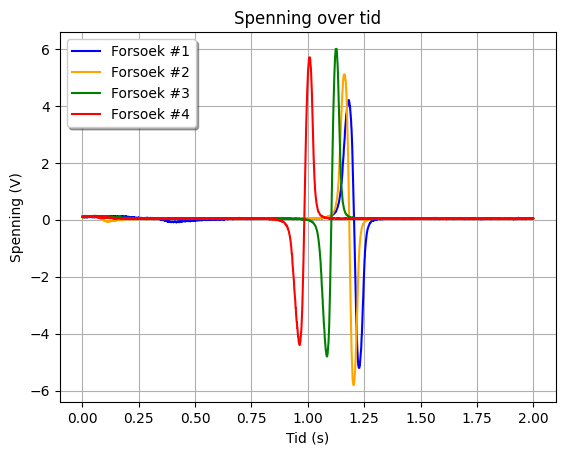

In [55]:
for i in range(len(ems)):
    plt.plot(tid, ems[i], label=lables[i], color=farger[i])
do_plot("Tid (s)", "Spenning (V)", "Spenning over tid")

Her under prøver jeg å finne integral til elektromagnetisk endring, aka. `ems`. Dette gir meg Volt * Sekund, alstå Voltsekund, eller også kjent som en *[Weber (Wb)](https://en.wikipedia.org/wiki/Weber_(unit)#Definition)*. Dette er en magnetisk Fluks, som også kan skrives som Tesla * kvadratmeter. Jeg finner både grafen som kommer ut fra dette og summen av absoluttverdien av arealet under grafen.

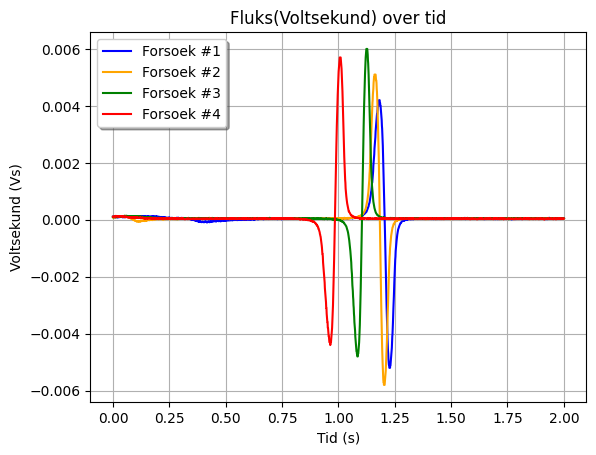

In [56]:
voltsekunder = []
voltsekund = []
for i in range(len(ems)):
    voltsekunder.append(0)
    voltsekund.append([])
    for j in range(len(ems[i])):
        voltsekunder[i] += abs(ems[i][j] * (0.001))
        voltsekund[i].append((ems[i][j] * (0.001)))

for i in range(len(voltsekund)):
    plt.plot(tid, voltsekund[i], label=lables[i], color=farger[i])
do_plot("Tid (s)", "Voltsekund (Vs)", "Fluks(Voltsekund) over tid")

Her gjør jeg derivasjon av punktene, dette gir meg Spenning over tid, (Volt / Sekund), altså spenningsendring, dette er ikke i seg selv noe særlig spennede annet enn for å finne monotoniegenskapene til grafen. Og da eventuelt gjette meg fram til hvilken graft som viser hvilken orientering av magneten.
Derivasjonen er numerisk:
$$
f'(x) = \frac{f(x+\Delta x) - f(x)}{\Delta x} = \frac{\Delta y}{\Delta x}
$$
Jeg er nødt til å gjøre dette numerisk, siden jeg ikke har en funksjons-likning, men jeg har en lang rekke punkter, dette tillater meg å gjøre den numeriske metoden.

Under har jeg lagt til en funksjon som deriverer med np, `np_derivasjon()`, denne er **IKKE** i bruk, men kan bli kommentert ut senere for ett finere resultat.

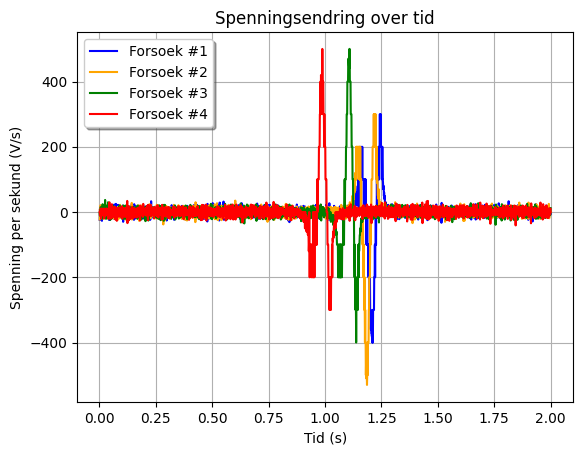

In [57]:
deriverte = []
for i in range(len(ems)):
    deriverte.append([])
    for j in range(len(ems[i])-1):
        deriverte[i].append((ems[i][j+1] - ems[i][j])/(tid[j+1]-tid[j]))
     
for i in range(len(deriverte)):
    plt.plot(tid[1:], deriverte[i], label=lables[i], color=farger[i])
do_plot("Tid (s)", "Spenning per sekund (V/s)", "Spenningsendring over tid")

def np_derivasjon(): 
    deriverte = []
    for i in range(len(ems)):
        deriverte.append(np.gradient(ems[i], tid))
    for i in range(len(deriverte)):
        plt.plot(tid, deriverte[i], label=lables[i], color=farger[i])
    do_plot("Tid (s)", "Spenning per sekund (V/s)", "Spenningsendring over tid")

#np_derivasjon() #Kjører numpy varianten, om du fjerner "#" fremst, skal fungere den også.

Her under har jeg en funksjon som finner monotoniegenskapene til grafen.

Jeg starter med å definere en toleranse, denne har jeg prøvd meg fram til, og den fungerer for de dataene jeg har. *Det kan godt hende at den ikke fungerer for annen data*.
Jeg fortsetter så på å se på hver av de deriverte, og lager en liste med fortegnene, altså 1, -1 eller 0, etter hvor disse verdiene er i forhold til toleransen, over, under eller inni.
| Over | Under | Inni |
|------|-------|------|
|1     |-1     |0     |

Jeg tar så å gjør `enumerate` på hver av disse listene med fortegn. Dette retunerer meg både plasseringen og verdien til hvert punkt i listen, derav `i`og `val`. Jeg legger så til `i` i en av listene ettersom hva `val` er. Jeg så for meg den reverserte listen av de jeg vil fjerne, `fjernings_indekser` og fjerner disse fra den respektive listen deres. Dette gjøre baklengs slik jeg ikke forskyver listen underveis.

Helt nederst tegner jeg så det området av grafen som er nødvendig (da med `beholde_indekser`, som område), og så plotter jeg dette, samt at jeg plotter på fortegnslinjene med samme farge.

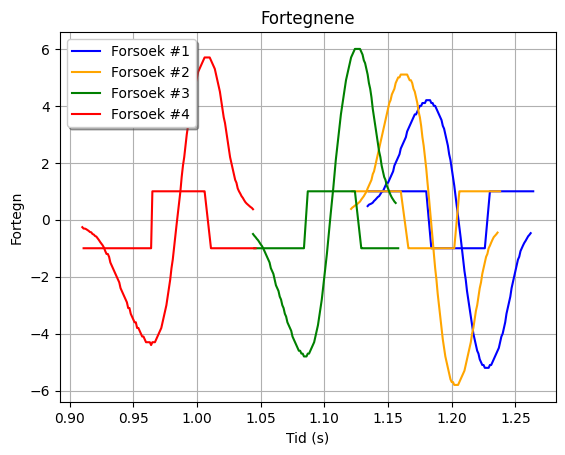

In [58]:
toleranse = 42 / 1e5 * eksponent

fortegn = []
tid_lok = []

fjernings_indekser = []
beholde_indekser = []

for j in range(len(deriverte)):
    fortegn.append([])
    tid_lok.append(tid[1:])
    fjernings_indekser.append([])
    beholde_indekser.append([])
    for i in range(len(deriverte[j])):
        if deriverte[j][i] > toleranse:
            fortegn[j].append(1 / 1e5 * eksponent)
        elif deriverte[j][i] < -toleranse:
            fortegn[j].append(-1 / 1e5 * eksponent)
        else:
            fortegn[j].append(0)

    for i, val in enumerate(fortegn[j]):
        if val == 0:
            fjernings_indekser[j].append(i)
        else:
            beholde_indekser[j].append(i)
    
    for i in reversed(fjernings_indekser[j]): # Her er den reversed slik at vi fjerner fra slutten av lista, slik at indeksene ikke endrer seg.
        del tid_lok[j][i]
        del fortegn[j][i]


for i in range(len(fortegn)):
    plt.plot(tid_lok[i], fortegn[i], label=lables[i], color=farger[i])
    plt.plot(tid[beholde_indekser[i][0]:beholde_indekser[i][-1]], ems[i][beholde_indekser[i][0]:beholde_indekser[i][-1]], color=farger[i])
do_plot("Tid (s)", "Fortegn", "Fortegnene")

Så skal jeg prøve å finne ut hvilke av forsøkene som hadde samme utgangspunkt, og skrive dette ut.
Dette gjør jeg med å først finne hver endring av pluss og minus, legge disse til i en lise `pos_neg`, og så finne plasseringen av hvilke som er negative og postive, så skriver jeg index-plasseringen til `lables[i]` av disse, samt forklarende tekst.

In [59]:
pos_neg = []
start_pos = []

for i in range(len(fortegn)):
    pos_neg.append([])
    for j in range(len(fortegn[i])-1):
        if fortegn[i][j] != fortegn[i][j+1]:
            pos_neg[i].append(round(fortegn[i][j]*1e5/eksponent))
    pos_neg[i].append(round(fortegn[i][-1]*1e5/eksponent))
    for j in range(len(pos_neg[i])):
        if pos_neg[i][j] == 1 and j != len(pos_neg[i])-1:
            start_pos.append(j)

pos_av_neg = []
pos_av_pos = []
for i, val in enumerate(start_pos):
    if val == 0:
        pos_av_neg.append(i)
    else:
        pos_av_pos.append(i)

Helt nederst skriver jeg ut informasjonen jeg har funnet som tekst, og som ikke er blitt vist som graf.

In [60]:
print("Totale Voltsekunder (integralen): ", voltsekunder)
print(" ")
print("Forsøkene:", ", ".join([lables[index] for index in pos_av_neg]), "starter med det samme fortegnet, '-' ")
print("Forsøkene:", ", ".join([lables[index] for index in pos_av_pos]), "starter med det samme fortegnet, '+' ")

Totale Voltsekunder (integralen):  [0.45238132999999975, 0.4461483199999998, 0.4560899000000011, 0.4486856999999998]
 
Forsøkene: Forsoek #1, Forsoek #2 starter med det samme fortegnet, '-' 
Forsøkene: Forsoek #3, Forsoek #4 starter med det samme fortegnet, '+' 
